## Library Imports

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metapriv_stat import plot_calc
from metapriv_stat import rst_outlier_case2

## File from OpenNeuro Import
MULTI is the raw dataset "Multivariate Assessment of Inhibitory Control in Youth: Links with Psychopathology and Brain Function Dataset" taken from OpenNeuro. 

In [ ]:
MULTI = 'https://s3.amazonaws.com/openneuro.org/ds004935/participants.tsv?versionId=pKNEG7Cn89OmcUDIq5B13qzn9x5Uizlf'
MULTI = pd.read_csv(MULTI, sep='\t')
WASI = 'https://s3.amazonaws.com/openneuro.org/ds004935/phenotype/WASI.tsv?versionId=FwdhWCxaUUiXmwoh6ELNocg3k84qoAjP'
WASI = pd.read_csv(WASI, sep='\t')
MULTI = MULTI.merge(WASI[['participant_id', 'WASI_score']], on='participant_id', how='left')
KSAD = 'https://s3.amazonaws.com/openneuro.org/ds004935/phenotype/KSADS.tsv?versionId=k4eJOEZkzDF2zpwsVFJgmS60AL6ObXVi'
KSAD = pd.read_csv(KSAD, sep='\t')
MULTI = MULTI.merge(KSAD, on='participant_id', how='left')


MULTI['income'] = MULTI['income'].replace(99, np.nan)
MULTI['race'] = MULTI['race'].replace('UNKNOWN', np.nan)
MULTI.to_csv('data_ds004935/MULTI_dataset_ds004935.csv', sep=',', index=False)

In [80]:
MULTI = pd.read_csv('data_ds004935/MULTI_dataset_ds004935.csv', sep=',')

## Load in of results calculated using (MetaprivBIDS App)

The selected quasi identifers are: 
- age
- highest_education
- income
- race
- ethnicity
- sex

The selected sensitive variables are:
- race 

The dis-score fraction is the default 0.3 & missing values are indicated as NaN.

In [81]:
suda = pd.read_csv('data_ds004935/suda_ds004935.csv', sep=',')
pif = pd.read_csv('data_ds004935/pif_ds004935.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds004935/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds004935/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds004935/k-combined-3-6.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds004935/normalized_difference_results_non.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})

In [82]:
k_combined_field


,variable,Normalized Difference
0,age,0.7
1,highest_education,0.0
2,income,0.0
3,race,0.0
4,ethnicity,0.0
5,sex,0.0


## Using MetaprivBIDS stats import to calculate Pearson and Spearman correlation on field and row level.


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.85, P-value: 0.0000
Kendall's Tau between suda & pif: 0.70, p-value: 0.0000


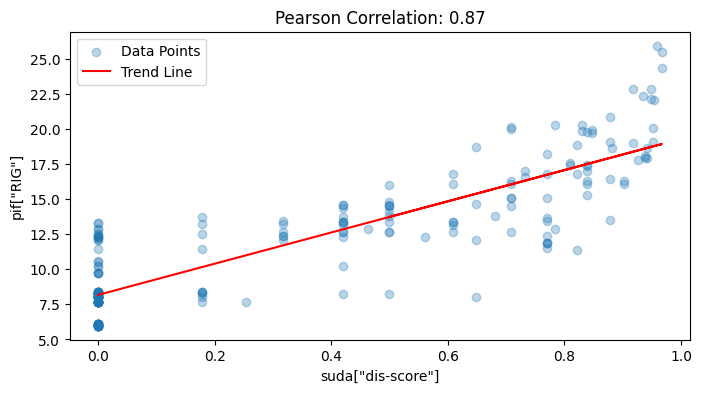

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.65
Pearson Correlation between K-combined & PIF field level: 0.98
Pearson Correlation between SUDA & K-combined field level: 0.53


Spearman Rank Correlation between PIF & SUDA: 0.71, P-value: 0.1108
Spearman Rank Correlation between PIF & K: 0.65, P-value: 0.1583
Spearman Rank Correlation between SUDA & K: 0.65, P-value: 0.1583


In [83]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

## Iterating through all possible combination of variables & calculating the correlation between SUDA, K-Global and PIF 

In [84]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, MULTI, sample_fraction=0.3, missing_value= np.nan)

/Users/emiliekibsgaard/opt/anaconda3/envs/rpy2_env/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:68: UserWarning: Error while trying to convert the column "race". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'str'> and <class 'int'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  % (name, str(e)))


Spearman Correlation between Suda sum and K-combined: 0.72
Pearson correlation to Suda sum & K-combined 0.3811470000436853
________________________________________________________________________
Pearson Correlation: 0.3811470000436853


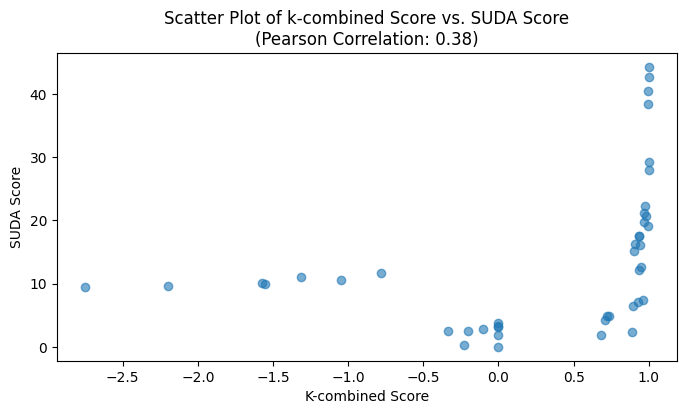

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: 0.87
Pearson correlation to PIF 95% & K-combined 0.7029699291427147


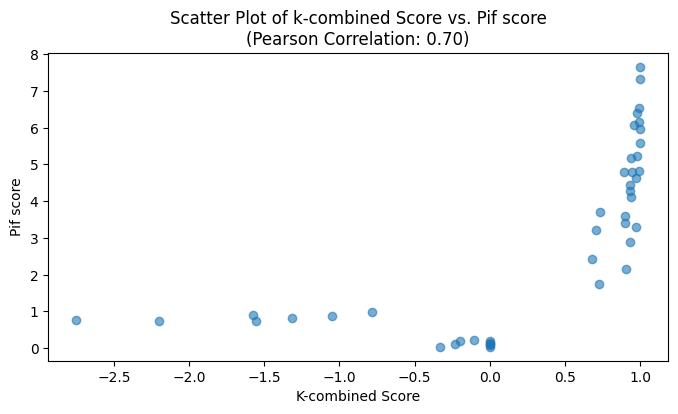

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.77
Pearson correlation to PIF 95% & SUDA 0.7365510685679836


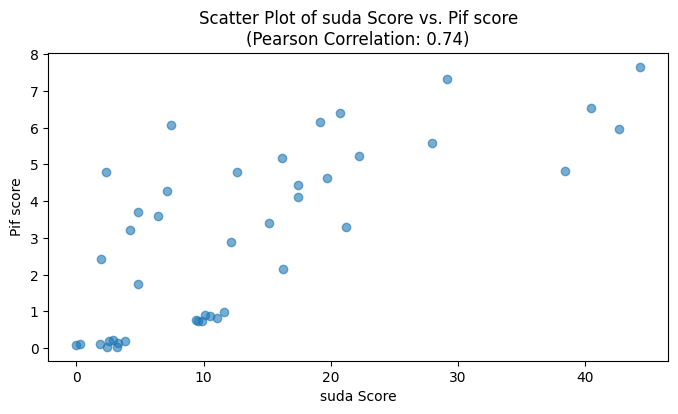

In [85]:
plot_calc(sum_score_df)

# T-test between risky and non-risky k-global values for variables. 


### Non risk variables

In [86]:
k_combined_field_non_risk

,variable,Normalized Difference
0,Flanker,6.0
1,K_SADS_PL_ADHD,3.5
2,SST,3.0
3,AXCPT,2.5
4,fmri_data,2.0
5,AS,1.5
6,K_SADS_PL_ODD,1.5
7,WASI_score,1.5
8,K_SADS_PL_GAD,1.0
9,K_SADS_PL_MANIA,0.0


# Risk Variables

In [87]:
k_combined_field

,variable,Normalized Difference
0,age,0.7
1,highest_education,0.0
2,income,0.0
3,race,0.0
4,ethnicity,0.0
5,sex,0.0


## Result of Paired T-test

In [88]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)

mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)

t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

Mean, risk identifiers: 0.11666666666666665
Mean, non-risk identifiers: 0.6617647058823529
t: -0.9734458378225159 p-value: 0.33648795085379657


# Outlier detection for PIF & SUDA

In [89]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')
print(len(above_outlier_indices))
print(above_outlier_indices)

class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

print(above_outlier_indices)


41
[3, 8, 10, 11, 16, 17, 19, 31, 32, 36, 37, 41, 47, 52, 60, 63, 73, 82, 93, 101, 106, 107, 108, 117, 123, 128, 130, 134, 139, 145, 150, 156, 165, 166, 168, 171, 177, 191, 207, 211, 218]
2
[36, 150]


## Outlier Participant  

In [90]:
MULTI.loc[36]

participant_id                    sub-23629
age                                   9.877
sex                                       F
race                         MULTIPLE RACES
ethnicity                                 1
highest_education                       3.0
income                                  3.0
clinical_scores                           1
behavioral_data                           1
fmri_data                                 1
AXCPT                                     1
AS                                        0
SST                                       0
Flanker                                   0
WASI_score                            108.0
K_SADS_PL_MDD                             0
K_SADS_PL_MANIA                           0
K_SADS_PL_HYPOMANIA                       0
K_SADS_PL_PSYCHOSIS                       0
K_SADS_PL_PANIC_DISORDER                  0
K_SADS_PL_SAD                             1
K_SADS_PL_AVOID_DISORDER                  1
K_SADS_PL_AGORAPHOBIA           

## Outliers after improvements

In [91]:
suda = pd.read_csv('data_ds004935/suda_redone_ds004935.csv', sep=',')
pif = pd.read_csv('data_ds004935/pif_redone_ds004935.csv', sep=',',index_col='Unnamed: 0').sort_index()

In [93]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')
print(len(above_outlier_indices))
print(above_outlier_indices)

class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

print(above_outlier_indices)


45
[3, 8, 10, 11, 12, 16, 17, 19, 24, 25, 36, 37, 52, 60, 63, 64, 93, 103, 106, 107, 108, 116, 117, 123, 126, 127, 128, 130, 133, 134, 139, 145, 146, 150, 152, 155, 165, 166, 171, 177, 181, 191, 207, 211, 218]
28
[3, 14, 15, 16, 17, 31, 32, 36, 52, 63, 64, 91, 93, 101, 106, 107, 116, 117, 123, 130, 139, 145, 150, 155, 171, 177, 181, 218]
